In [1]:
!pip install numpy
!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Text(0, 0.5, 'Y values')

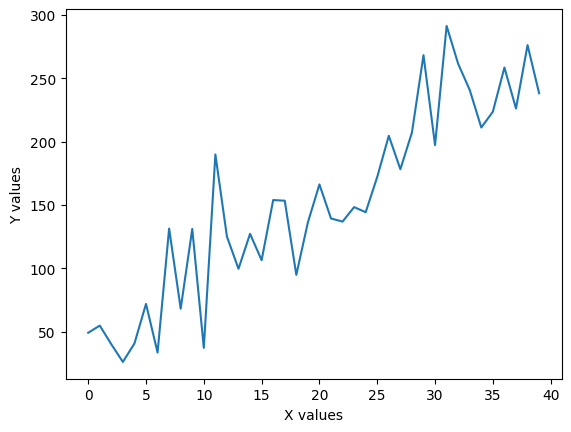

In [6]:
file_path = 'data.v3.txt'
data_array = np.loadtxt(file_path)
array1 = data_array[:, 0] 
array2 = data_array[:, 1]  
array3 = data_array[:, 2] 
plt.plot(array1,array2, label='Plot')
plt.xlabel("X values")
plt.ylabel("Y values")

5.86478455909944
37.15417109756102


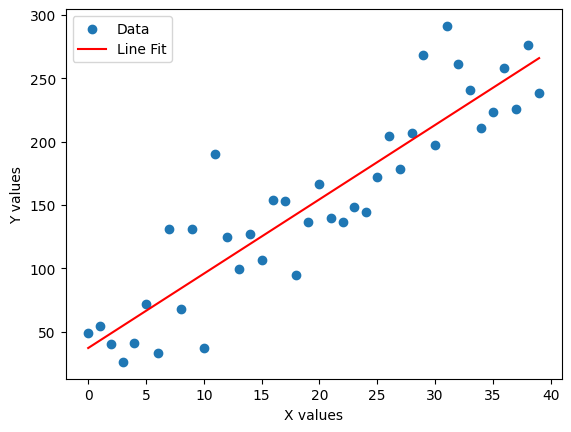

In [14]:
file_path = 'data.v3.txt'
data_array = np.loadtxt(file_path)
array1 = data_array[:, 0] 
array2 = data_array[:, 1]  

# Fit a line to the data
coefficients = np.polyfit(array1, array2, 1)
slope, intercept = coefficients

# Print the fit parameters
print(slope)
print(intercept)

# Create a polynomial function using the coefficients
line_fit = np.poly1d(coefficients)

# Plot the original data
plt.scatter(array1, array2, label='Data')

# Plot the line fit
plt.plot(array1, line_fit(array1), color='red', label='Line Fit')

plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()

5.864784559099436
37.15417109756095


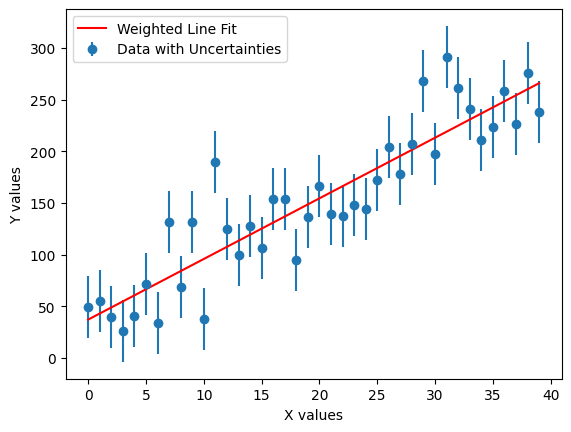

In [15]:
array1 = data_array[:, 0] 
array2 = data_array[:, 1]  
uncertainties = data_array[:, 2]

# Calculate the weights for each data point
weights = 1.0 / uncertainties

# Fit a line to the data using uncertainties as weights
coefficients, _ = np.polyfit(array1, array2, 1, w=weights, cov=True)

# Extract the slope and intercept
slope, intercept = coefficients

# Print the fit parameters
print(slope)
print(intercept)

# Create a polynomial function using the coefficients
line_fit = np.poly1d(coefficients)

# Plot the original data
plt.errorbar(array1, array2, yerr=uncertainties, fmt='o', label='Data with Uncertainties')

# Plot the line fit
x_range = np.linspace(min(array1), max(array1), 100)
plt.plot(x_range, line_fit(x_range), color='red', label='Weighted Line Fit')

plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()

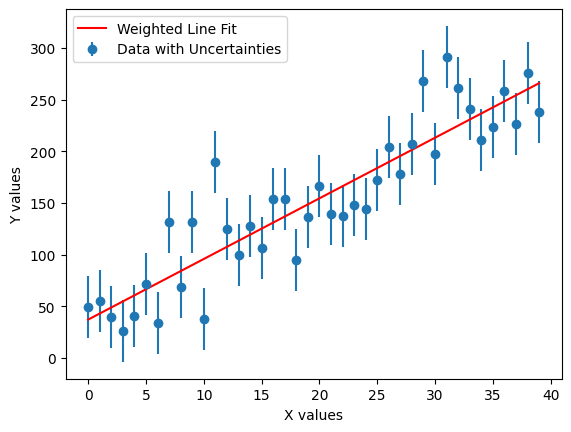

In [17]:
def fit_and_plot_line(x, y, dy):
    # Calculate the weights for each data point
    weights = 1.0 / dy
    
    # Fit a line to the data using uncertainties as weights
    coefficients, _ = np.polyfit(x, y, 1, w=weights, cov=True)
    
    # Extract the slope and intercept
    slope, intercept = coefficients
    
    # Create a polynomial function using the coefficients
    line_fit = np.poly1d(coefficients)
    
    # Plot the original data
    plt.errorbar(x, y, yerr=dy, fmt='o', label='Data with Uncertainties')
    
    # Plot the line fit
    x_range = np.linspace(min(x), max(x), 100)
    plt.plot(x_range, line_fit(x_range), color='red', label='Weighted Line Fit')
    
    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.legend()
    plt.show()

# Example usage:
fit_and_plot_line(array1, array2, uncertainties)